Sample code for calculating the Cross Entropies between HR and Temp for the first two subjects

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pickle
import EntropyHub as EH
import gc 
import warnings
warnings.filterwarnings("ignore")

In [4]:
dropped_subjects = []

first_subject_id = 1
last_subject_id = 16 # We have 16 subjects in total, here just as an example I have only imported data from the first two subjects 


data_folder = 'new_data' # Change this to the folder in your PC with the saved data
folder_to_save = 'saved_2' # Folder to save computed entropies

#name of row
XEntropy_signals = 'hr+bvp' 


In [5]:
fs = {} # Dictionary to store sampling frequency of each signal
fs["acc"] = 32
fs["bvp"] = 64
fs["eda"] = 4
fs["temp"] = 4
fs["hr"]  = 1

epoch_seconds = 5 * 60 # 1 epoch is 5 minutes => 5min * 60 seconds/min = 300 seconds 

epoch_size = 300
# e4_dfs_list = {' hr',' temp', ' eda', ' acc', ' bvp'} 

e4_dfs_list = {'hr', 'bvp'}


In [6]:
segmented_dfs = {}
for subject_id in [id for id in range(first_subject_id, last_subject_id + 1) if id not in dropped_subjects]:
    segmented_dfs[subject_id] = pd.read_pickle(f'{data_folder}/segmented_df_{subject_id}_5MIN.pkl') 
    print(f'Loaded segmented df for subject {subject_id}.')

Loaded segmented df for subject 1.
Loaded segmented df for subject 2.
Loaded segmented df for subject 3.
Loaded segmented df for subject 4.
Loaded segmented df for subject 5.
Loaded segmented df for subject 6.
Loaded segmented df for subject 7.
Loaded segmented df for subject 8.
Loaded segmented df for subject 9.
Loaded segmented df for subject 10.
Loaded segmented df for subject 11.
Loaded segmented df for subject 12.
Loaded segmented df for subject 13.
Loaded segmented df for subject 14.
Loaded segmented df for subject 15.
Loaded segmented df for subject 16.


In [7]:
# Function to resample each nested dataframe
def resample_nested_df(nested_df, max_rows):
   
    resampled_df = nested_df.resample('1S').mean().tail(max_rows)
    
    return resampled_df 

In [ ]:
for subject_id in [id for id in range(first_subject_id, last_subject_id + 1) if id not in dropped_subjects]:
    segmented_dfs[subject_id]['temp_segments'] = segmented_dfs[subject_id]['temp_segments'].apply(lambda x: resample_nested_df(x, max_rows=epoch_size))
    segmented_dfs[subject_id]['acc_segments'] = segmented_dfs[subject_id]['acc_segments'].apply(lambda x: resample_nested_df(x, max_rows=epoch_size))
    segmented_dfs[subject_id]['eda_segments'] = segmented_dfs[subject_id]['eda_segments'].apply(lambda x: resample_nested_df(x, max_rows=epoch_size))
    segmented_dfs[subject_id]['bvp_segments'] = segmented_dfs[subject_id]['bvp_segments'].apply(lambda x: resample_nested_df(x, max_rows=epoch_size))

Coarse graining 

In [ ]:
#F/M 

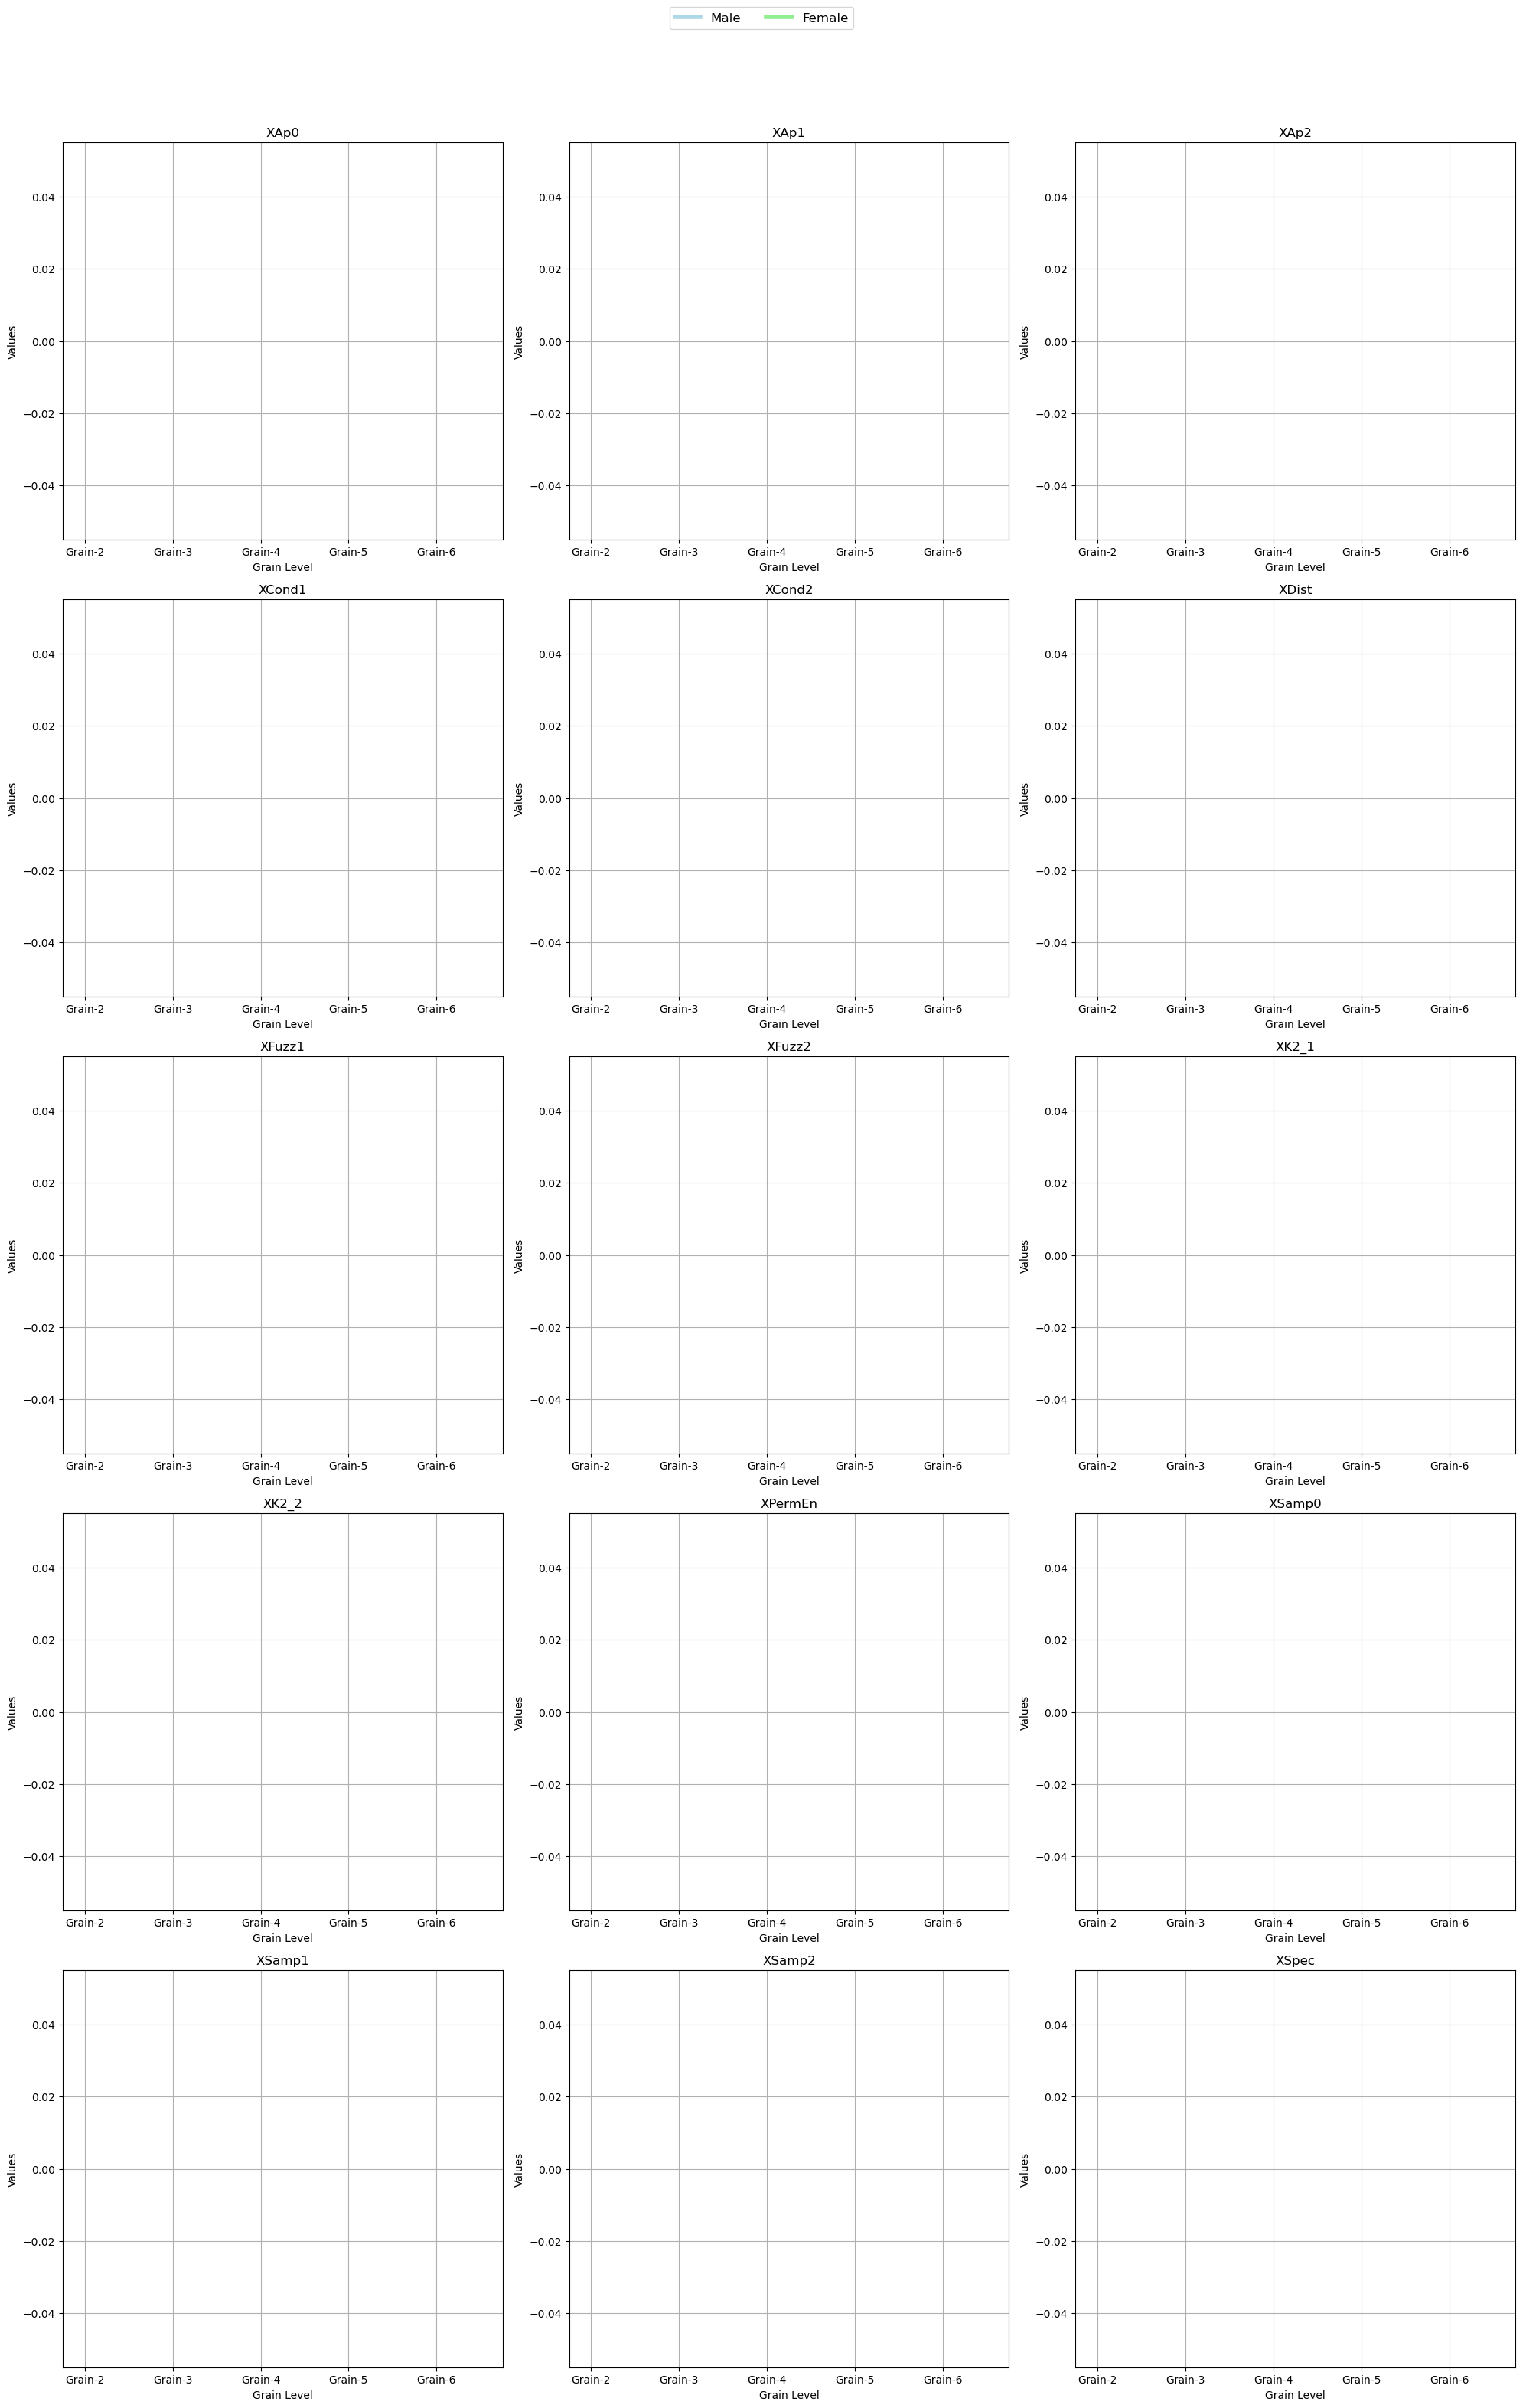

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

subject_groups = {
    1: 'F', 2: 'M', 3: 'F', 4: 'F', 5: 'F', 6: 'F', 7: 'F', 8: 'F', 9: 'M',
    10: 'F', 11: 'M', 12: 'M', 13: 'M', 14: 'M', 15: 'F', 16: 'M'
}

cross_folder = 'updated_cross'
features = ["hr+temp_XAp0", "hr+temp_XAp1", "hr+temp_XAp2",
    "hr+temp_XCond1", "hr+temp_XCond2",  
    "hr+temp_XDist",
    "hr+temp_XFuzz1","hr+temp_XFuzz2",
    "hr+temp_XK2_1",  "hr+temp_XK2_2", 
    "hr+temp_XPermEn",
    "hr+temp_XSamp0","hr+temp_XSamp1", "hr+temp_XSamp2",
    "hr+temp_XSpec"]

# Define different graining functions
def apply_graining_2(data):
    return [sum(data[i:i+2])/2 for i in range(0, len(data)-1, 2)]  

def apply_graining_3(data):
    return [sum(data[i:i+3])/3 for i in range(0, len(data)-2, 3)]  

def apply_graining_4(data):
    return [sum(data[i:i+4])/4 for i in range(0, len(data)-3, 4)]  

def apply_graining_5(data):
    return [sum(data[i:i+5])/5 for i in range(0, len(data)-4, 5)]  

def apply_graining_6(data):
    return [sum(data[i:i+6])/6 for i in range(0, len(data)-5, 6)]  

graining_methods = {
    "Grain-2": apply_graining_2,
    "Grain-3": apply_graining_3,
    "Grain-4": apply_graining_4,
    "Grain-5": apply_graining_5,
    "Grain-6": apply_graining_6
}

# Prepare a list to store data for the dataframe
data_for_df = []

# Read and process data
for subject_id in subject_groups:
    group = subject_groups.get(subject_id, None)
    
    if group:
        # Read CSV data for each subject
        csv_file = os.path.join(cross_folder, f'hr+temp_{subject_id}.csv')
        if os.path.exists(csv_file): 
            csv_data = pd.read_csv(csv_file)
            
            for feature in features:  
                if feature in csv_data.columns:
                    feature_data = csv_data[feature].dropna().tolist()
                    
                    # Apply graining methods (Grain-2, Grain-3, etc.)
                    for g_name, g_func in graining_methods.items():
                        grained_data = g_func(feature_data)
                        data_for_df.extend([(subject_id, group, feature, g_name, val) for val in grained_data])

df = pd.DataFrame(data_for_df, columns=['SubjectID', 'Group', 'Feature', 'Grain', 'Value'])
grains = ["Grain-2", "Grain-3", "Grain-4", "Grain-5", "Grain-6"]

def create_subplots(num_features):
    cols = 3  
    rows = (num_features + cols - 1) // cols  
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6)) 
    axes = axes.flatten()  
    return fig, axes

# Plot for each feature
fig, axes = create_subplots(len(features))

for i, feature in enumerate(features):
    ax = axes[i]
    
    feature_data = df[df['Feature'] == feature]
    
    data_to_plot_male = []
    data_to_plot_female = []
    labels = []
    
    for grain in grains:
        grain_data = feature_data[feature_data['Grain'] == grain]
        
        male_data = grain_data[grain_data['Group'] == 'M']['Value']
        female_data = grain_data[grain_data['Group'] == 'F']['Value']
        
        data_to_plot_male.append(male_data.tolist()) 
        data_to_plot_female.append(female_data.tolist())  
        labels.append(f'{grain} (M)') 
        labels.append(f'{grain} (F)') 

    ax.boxplot(data_to_plot_male, positions=np.arange(1, len(grains) * 2, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightblue'),  # Male color
               flierprops=dict(markerfacecolor='blue', marker='o'),
               medianprops=dict(color='blue'))
    
    ax.boxplot(data_to_plot_female, positions=np.arange(2, len(grains) * 2 + 1, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightgreen'),  # Female color
               flierprops=dict(markerfacecolor='green', marker='o'),
               medianprops=dict(color='green'))

    # Title and labels
    ax.set_title(f'{feature.replace("hr+temp_", "")}')
    ax.set_ylabel('Values')
    ax.set_xlabel('Grain Level')
    
    ax.set_xticks(np.arange(1, len(grains) * 2, 2))  
    ax.set_xticklabels(grains)
    ax.grid(True)

handles = [plt.Line2D([0], [0], color='lightblue', lw=4),
           plt.Line2D([0], [0], color='lightgreen', lw=4)]
labels = ['Male', 'Female']
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


In [ ]:
#F/M  direction-dependent

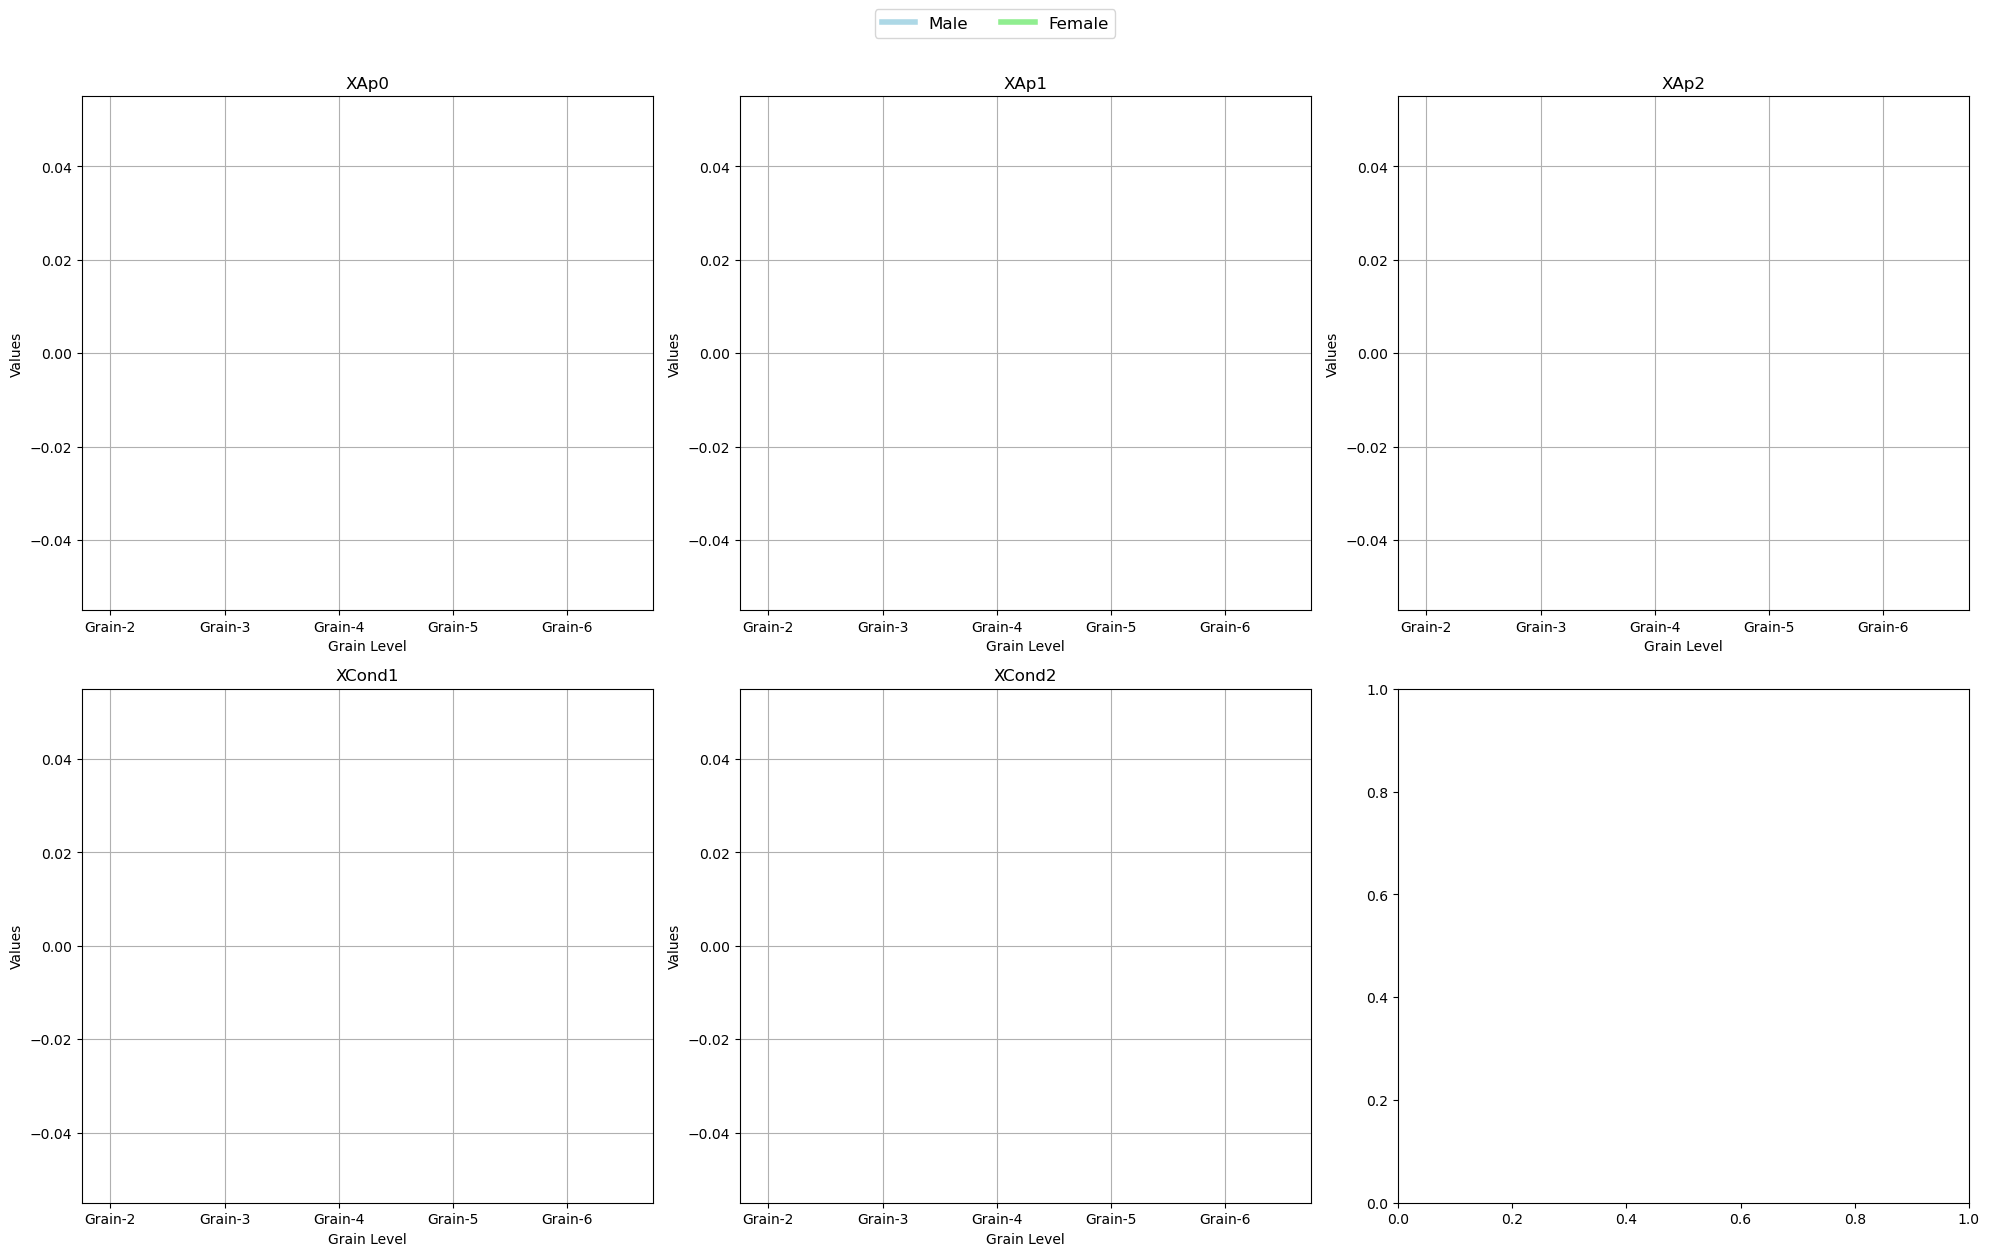

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

subject_groups = {
    1: 'F', 2: 'M', 3: 'F', 4: 'F', 5: 'F', 6: 'F', 7: 'F', 8: 'F', 9: 'M',
    10: 'F', 11: 'M', 12: 'M', 13: 'M', 14: 'M', 15: 'F', 16: 'M'
}

cross_folder = 'updated_cross'
features = ["hr+temp_XAp0", "hr+temp_XAp1", "hr+temp_XAp2",
    "hr+temp_XCond1", "hr+temp_XCond2"]

# Define different graining functions
def apply_graining_2(data):
    return [sum(data[i:i+2])/2 for i in range(0, len(data)-1, 2)]  

def apply_graining_3(data):
    return [sum(data[i:i+3])/3 for i in range(0, len(data)-2, 3)]  

def apply_graining_4(data):
    return [sum(data[i:i+4])/4 for i in range(0, len(data)-3, 4)]  

def apply_graining_5(data):
    return [sum(data[i:i+5])/5 for i in range(0, len(data)-4, 5)]  

def apply_graining_6(data):
    return [sum(data[i:i+6])/6 for i in range(0, len(data)-5, 6)]  

graining_methods = {
    "Grain-2": apply_graining_2,
    "Grain-3": apply_graining_3,
    "Grain-4": apply_graining_4,
    "Grain-5": apply_graining_5,
    "Grain-6": apply_graining_6
}

# Prepare a list to store data for the dataframe
data_for_df = []

# Read and process data
for subject_id in subject_groups:
    group = subject_groups.get(subject_id, None)
    
    if group:
        # Read CSV data for each subject
        csv_file = os.path.join(cross_folder, f'hr+temp_{subject_id}.csv')
        if os.path.exists(csv_file): 
            csv_data = pd.read_csv(csv_file)
            
            for feature in features:  
                if feature in csv_data.columns:
                    feature_data = csv_data[feature].dropna().tolist()
                    
                    # Apply graining methods (Grain-2, Grain-3, etc.)
                    for g_name, g_func in graining_methods.items():
                        grained_data = g_func(feature_data)
                        data_for_df.extend([(subject_id, group, feature, g_name, val) for val in grained_data])

df = pd.DataFrame(data_for_df, columns=['SubjectID', 'Group', 'Feature', 'Grain', 'Value'])
grains = ["Grain-2", "Grain-3", "Grain-4", "Grain-5", "Grain-6"]

def create_subplots(num_features):
    cols = 3  
    rows = (num_features + cols - 1) // cols  
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6)) 
    axes = axes.flatten()  
    return fig, axes

# Plot for each feature
fig, axes = create_subplots(len(features))

for i, feature in enumerate(features):
    ax = axes[i]
    
    feature_data = df[df['Feature'] == feature]
    
    data_to_plot_male = []
    data_to_plot_female = []
    labels = []
    
    for grain in grains:
        grain_data = feature_data[feature_data['Grain'] == grain]
        
        male_data = grain_data[grain_data['Group'] == 'M']['Value']
        female_data = grain_data[grain_data['Group'] == 'F']['Value']
        
        data_to_plot_male.append(male_data.tolist()) 
        data_to_plot_female.append(female_data.tolist())  
        labels.append(f'{grain} (M)') 
        labels.append(f'{grain} (F)') 

    ax.boxplot(data_to_plot_male, positions=np.arange(1, len(grains) * 2, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightblue'),  # Male color
               flierprops=dict(markerfacecolor='blue', marker='o'),
               medianprops=dict(color='blue'))
    
    ax.boxplot(data_to_plot_female, positions=np.arange(2, len(grains) * 2 + 1, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightgreen'),  # Female color
               flierprops=dict(markerfacecolor='green', marker='o'),
               medianprops=dict(color='green'))

    # Title and labels
    ax.set_title(f'{feature.replace("hr+temp_", "")}')
    ax.set_ylabel('Values')
    ax.set_xlabel('Grain Level')
    
    ax.set_xticks(np.arange(1, len(grains) * 2, 2))  
    ax.set_xticklabels(grains)
    ax.grid(True)

handles = [plt.Line2D([0], [0], color='lightblue', lw=4),
           plt.Line2D([0], [0], color='lightgreen', lw=4)]
labels = ['Male', 'Female']
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


In [ ]:
#HN/PD

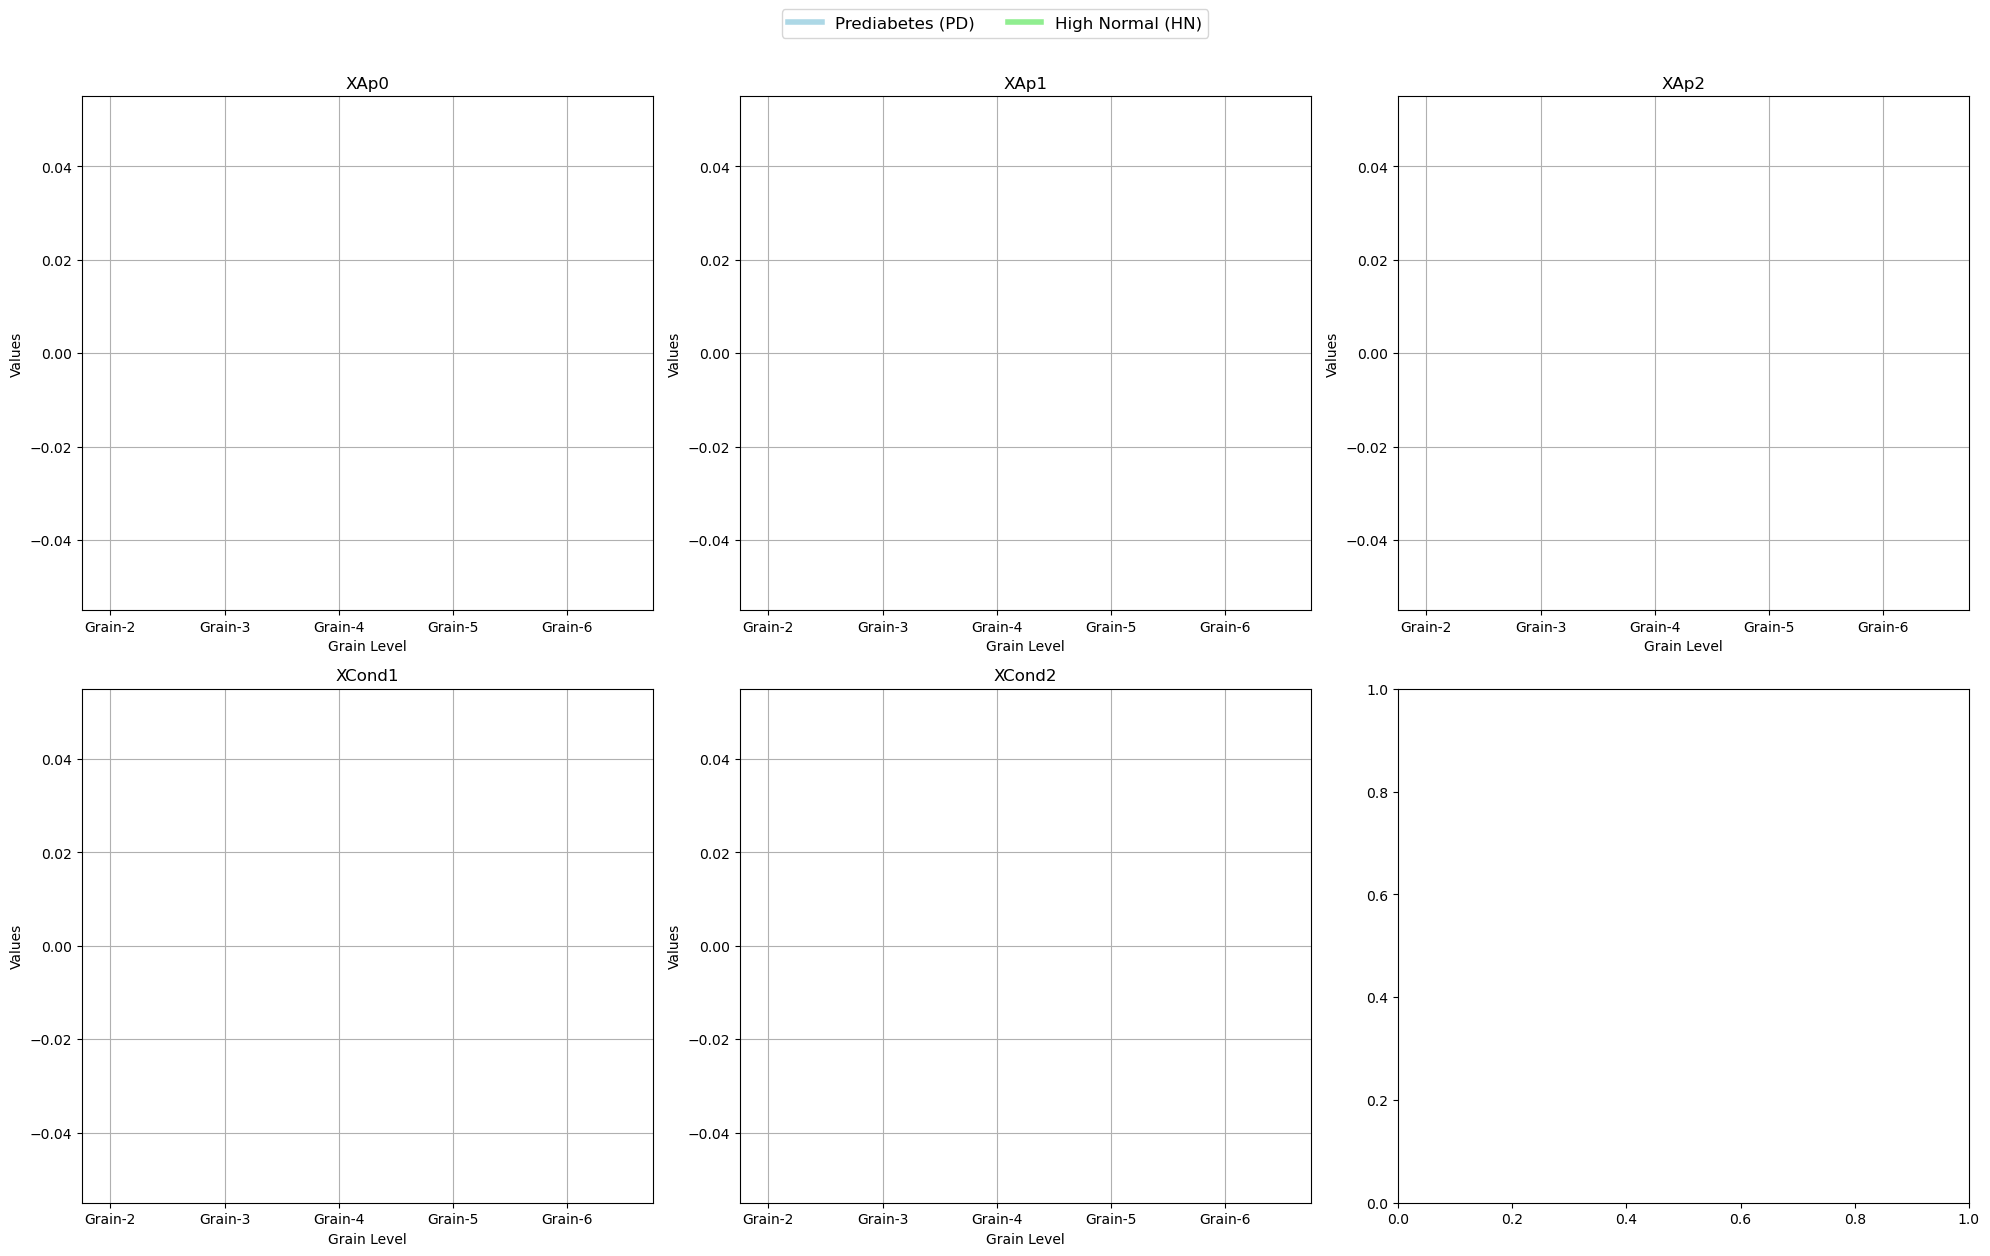

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

subject_groups = {
    1: 'HN', 
    2: 'HN', 
    3: 'PD', 
    4: 'PD', 
    5: 'PD', 
    6: 'PD', 
    7: 'HN', 
    8: 'HN', 
    9: 'PD', 
    10: 'PD', 
    11: 'PD', 
    12: 'HN', 
    13: 'PD', 
    14: 'HN', 
    15: 'HN', 
    16: 'HN'
}

cross_folder = 'updated_cross'
features = ["hr+temp_XAp0", "hr+temp_XAp1", "hr+temp_XAp2",
    "hr+temp_XCond1", "hr+temp_XCond2"]

# Define different graining functions
def apply_graining_2(data):
    return [sum(data[i:i+2])/2 for i in range(0, len(data)-1, 2)]  

def apply_graining_3(data):
    return [sum(data[i:i+3])/3 for i in range(0, len(data)-2, 3)]  

def apply_graining_4(data):
    return [sum(data[i:i+4])/4 for i in range(0, len(data)-3, 4)]  

def apply_graining_5(data):
    return [sum(data[i:i+5])/5 for i in range(0, len(data)-4, 5)]  

def apply_graining_6(data):
    return [sum(data[i:i+6])/6 for i in range(0, len(data)-5, 6)]  

graining_methods = {
    "Grain-2": apply_graining_2,
    "Grain-3": apply_graining_3,
    "Grain-4": apply_graining_4,
    "Grain-5": apply_graining_5,
    "Grain-6": apply_graining_6
}

data_for_df = []

for subject_id in subject_groups:
    group = subject_groups.get(subject_id, None)
    
    if group:
        # Read CSV data for each subject
        csv_file = os.path.join(cross_folder, f'hr+temp_{subject_id}.csv')
        if os.path.exists(csv_file): 
            csv_data = pd.read_csv(csv_file)
            
            for feature in features:  
                if feature in csv_data.columns:
                    feature_data = csv_data[feature].dropna().tolist()
                    
                    # Apply graining methods (Grain-2, Grain-3, etc.)
                    for g_name, g_func in graining_methods.items():
                        grained_data = g_func(feature_data)
                        data_for_df.extend([(subject_id, group, feature, g_name, val) for val in grained_data])

df = pd.DataFrame(data_for_df, columns=['SubjectID', 'Group', 'Feature', 'Grain', 'Value'])
grains = ["Grain-2", "Grain-3", "Grain-4", "Grain-5", "Grain-6"]

def create_subplots(num_features):
    cols = 3  
    rows = (num_features + cols - 1) // cols  
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6)) 
    axes = axes.flatten()  
    return fig, axes

# Plot for each feature
fig, axes = create_subplots(len(features))

for i, feature in enumerate(features):
    ax = axes[i]
    
    feature_data = df[df['Feature'] == feature]
    
    data_to_plot_pd = [] 
    data_to_plot_hn = [] 
    
    for grain in grains:
        grain_data = feature_data[feature_data['Grain'] == grain]
        
        pd_data = grain_data[grain_data['Group'] == 'PD']['Value']  
        hn_data = grain_data[grain_data['Group'] == 'HN']['Value'] 
                
        data_to_plot_pd.append(pd_data.tolist())  
        data_to_plot_hn.append(hn_data.tolist())  

    ax.boxplot(data_to_plot_pd, positions=np.arange(1, len(grains) * 2, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightblue'),  
               flierprops=dict(markerfacecolor='blue', marker='o'),
               medianprops=dict(color='blue'))
    
    ax.boxplot(data_to_plot_hn, positions=np.arange(2, len(grains) * 2 + 1, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightgreen'),  
               flierprops=dict(markerfacecolor='green', marker='o'),
               medianprops=dict(color='green'))

    ax.set_title(f'{feature.replace("hr+temp_", "")}')
    ax.set_ylabel('Values')
    ax.set_xlabel('Grain Level')
    
    ax.set_xticks(np.arange(1, len(grains) * 2, 2))  
    ax.set_xticklabels(grains)
    ax.grid(True)

handles = [plt.Line2D([0], [0], color='lightblue', lw=4),
           plt.Line2D([0], [0], color='lightgreen', lw=4)]
labels = ['Prediabetes (PD)', 'High Normal (HN)']
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


#H/N  direction-dependent

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

subject_groups = {
    1: 'HN', 
    2: 'HN', 
    3: 'PD', 
    4: 'PD', 
    5: 'PD', 
    6: 'PD', 
    7: 'HN', 
    8: 'HN', 
    9: 'PD', 
    10: 'PD', 
    11: 'PD', 
    12: 'HN', 
    13: 'PD', 
    14: 'HN', 
    15: 'HN', 
    16: 'HN'
}

cross_folder = 'updated_cross'
features = ["hr+temp_XAp0", "hr+temp_XAp1", "hr+temp_XAp2",
    "hr+temp_XCond1", "hr+temp_XCond2"]

# Define different graining functions
def apply_graining_2(data):
    return [sum(data[i:i+2])/2 for i in range(0, len(data)-1, 2)]  

def apply_graining_3(data):
    return [sum(data[i:i+3])/3 for i in range(0, len(data)-2, 3)]  

def apply_graining_4(data):
    return [sum(data[i:i+4])/4 for i in range(0, len(data)-3, 4)]  

def apply_graining_5(data):
    return [sum(data[i:i+5])/5 for i in range(0, len(data)-4, 5)]  

def apply_graining_6(data):
    return [sum(data[i:i+6])/6 for i in range(0, len(data)-5, 6)]  

graining_methods = {
    "Grain-2": apply_graining_2,
    "Grain-3": apply_graining_3,
    "Grain-4": apply_graining_4,
    "Grain-5": apply_graining_5,
    "Grain-6": apply_graining_6
}

data_for_df = []

for subject_id in subject_groups:
    group = subject_groups.get(subject_id, None)
    
    if group:
        # Read CSV data for each subject
        csv_file = os.path.join(cross_folder, f'hr+temp_{subject_id}.csv')
        if os.path.exists(csv_file): 
            csv_data = pd.read_csv(csv_file)
            
            for feature in features:  
                if feature in csv_data.columns:
                    feature_data = csv_data[feature].dropna().tolist()
                    
                    # Apply graining methods (Grain-2, Grain-3, etc.)
                    for g_name, g_func in graining_methods.items():
                        grained_data = g_func(feature_data)
                        data_for_df.extend([(subject_id, group, feature, g_name, val) for val in grained_data])

df = pd.DataFrame(data_for_df, columns=['SubjectID', 'Group', 'Feature', 'Grain', 'Value'])
grains = ["Grain-2", "Grain-3", "Grain-4", "Grain-5", "Grain-6"]

def create_subplots(num_features):
    cols = 3  
    rows = (num_features + cols - 1) // cols  
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6)) 
    axes = axes.flatten()  
    return fig, axes

# Plot for each feature
fig, axes = create_subplots(len(features))

for i, feature in enumerate(features):
    ax = axes[i]
    
    feature_data = df[df['Feature'] == feature]
    
    data_to_plot_pd = [] 
    data_to_plot_hn = [] 
    
    for grain in grains:
        grain_data = feature_data[feature_data['Grain'] == grain]
        
        pd_data = grain_data[grain_data['Group'] == 'PD']['Value']  
        hn_data = grain_data[grain_data['Group'] == 'HN']['Value'] 
                
        data_to_plot_pd.append(pd_data.tolist())  
        data_to_plot_hn.append(hn_data.tolist())  

    ax.boxplot(data_to_plot_pd, positions=np.arange(1, len(grains) * 2, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightblue'),  
               flierprops=dict(markerfacecolor='blue', marker='o'),
               medianprops=dict(color='blue'))
    
    ax.boxplot(data_to_plot_hn, positions=np.arange(2, len(grains) * 2 + 1, 2), labels=grains, patch_artist=True, sym="",
               boxprops=dict(facecolor='lightgreen'),  
               flierprops=dict(markerfacecolor='green', marker='o'),
               medianprops=dict(color='green'))

    ax.set_title(f'{feature.replace("hr+temp_", "")}')
    ax.set_ylabel('Values')
    ax.set_xlabel('Grain Level')
    
    ax.set_xticks(np.arange(1, len(grains) * 2, 2))  
    ax.set_xticklabels(grains)
    ax.grid(True)

handles = [plt.Line2D([0], [0], color='lightblue', lw=4),
           plt.Line2D([0], [0], color='lightgreen', lw=4)]
labels = ['Prediabetes (PD)', 'High Normal (HN)']
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()
